### Load Saved Section if exists

### Load libraries, functions, palette, theme

In [1]:
import os

In [2]:
# read file from another directory
path = \
    ('/Users/a-chasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/'
     'Мой диск/Data Science Projects/economics-rus/')

os.chdir(path + 'notebooks/')

# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

# import libraries, etc.
%run load.ipynb

# and go back to current directory ('current_path' variable is assigned in _load.ipynb)
os.chdir(current_path)

In [3]:
save_img = path + 'docs/img'

In [4]:
economics_data = loadit(
    'economics_data',
    dir= path + 'data/00-Datasets/'
)

In [5]:
len(economics_data)

95

## <font color='#2A5899'> Чиновники

#### Численность работников государственных органов и органов местного самоуправления на 1000 человек занятых в экономике

In [6]:
officials_number_1000_busy = economics_data['12.01'].copy()

In [7]:
officials_number_1000_busy

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Российская Федерация,18.0,17.6,19.1,19.7,19.9,21.9,23.5,23.9,24.4,24.9,...,22.8,32.6,30.1,29.8,30.2,30.1,30.4,33.5,32.1,31.5
Центральный федеральный округ,15.1,14.7,16.2,16.8,16.9,18.9,20.1,20.5,20.7,21.1,...,18.8,27.7,23.8,23.3,23.3,23.3,23.6,25.6,24.9,24.4
Белгородская область,19.2,19.1,21.9,23.1,23.5,25.7,27.3,27.7,28.6,28.4,...,26.9,33.8,30.6,29.6,29.3,29.3,29.2,32.2,30.5,29.9
Брянская область,21.0,20.3,23.5,24.6,25.1,26.9,27.3,27.8,28.1,28.5,...,28.1,39.9,37.5,36.8,38.3,38.8,43.2,45.3,42.6,41.9
Владимирская область,17.5,16.4,17.7,18.1,18.6,20.4,21.5,22.1,23.3,22.1,...,17.5,26.5,26.8,27.3,27.9,28.0,27.3,32.0,31.5,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,21.4,21.8,23.7,25.5,26.4,28.6,31.4,31.3,31.8,30.2,...,29.2,40.5,42.4,42.2,43.0,45.0,42.4,45.7,45.0,42.4
Магаданская область,37.4,36.7,41.2,43.6,44.7,53.4,57.9,60.5,62.5,65.3,...,63.8,84.3,78.2,74.9,76.6,75.9,72.2,80.6,74.0,77.9
Сахалинская область,28.6,28.0,30.6,31.0,31.8,35.8,35.5,37.5,37.8,39.1,...,32.1,37.0,42.9,42.6,42.5,42.4,42.9,45.9,46.9,46.5
Еврейская автономная область,37.9,38.7,39.7,40.8,40.4,45.0,47.2,49.1,50.3,47.5,...,48.9,67.9,70.0,66.9,74.5,75.5,74.6,93.1,93.7,79.9


In [8]:
officials_number_1000_busy_rf = officials_number_1000_busy.iloc[0, :].copy()

In [9]:
officials_number_1000_busy_rf_smoothed = smoothed(
    arange(2000, 2022, True), officials_number_1000_busy_rf, return_type='df')

In [10]:
officials_number_1000_busy_rf_smoothed.head()

,value
2000.000000,18.000000
2000.073579,17.829790
2000.147157,17.687288
2000.220736,17.571110
2000.294314,17.479873


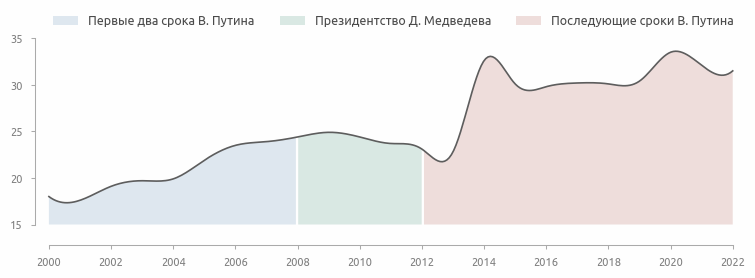

Image 'officials-1000-workers.svg' successfully saved into '/Users/a-chasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economics-rus/docs/img' directory


In [58]:
fig, ax = plt.subplots(figsize=(9, 2.5))
plt.plot(officials_number_1000_busy_rf_smoothed)

plot_fill_between(
    x=officials_number_1000_busy_rf_smoothed.loc[2000:2008].index,
    y1=15, y2=officials_number_1000_busy_rf_smoothed.loc[2000:2008, 'value'],
    color=palette[2], alpha=0.2, ax=ax,
    label='Первые два срока В. Путина')
plot_fill_between(
    x=officials_number_1000_busy_rf_smoothed.loc[2008:2012].index,
    y1=15, y2=officials_number_1000_busy_rf_smoothed.loc[2008:2012, 'value'],
    color=palette[3], alpha=0.2, ax=ax,
    label='Президентство Д. Медведева')
plot_fill_between(
    x=officials_number_1000_busy_rf_smoothed.loc[2012:].index,
    y1=15, y2=officials_number_1000_busy_rf_smoothed.loc[2012:, 'value'],
    color=palette[1], alpha=0.2, ax=ax,
    label='Последующие сроки В. Путина')

plt.legend(**legend_inline, ncols=3, fontsize=9)
axis_rstyle(
    xticks=[2000, 2022, 2],
    yticks=[15, 35, 5]
)
plt.show()

savefig('officials-1000-workers', dir=save_img, dpi=100)

In [13]:
# Губернаторы

In [14]:
piro = economics_data['12.02'].copy()

In [15]:
piro.iloc[:, :7]

,governor_name,identification_governor,region_name,federal_district_name,year,appt,lft
0,Жамсуев Баир Баясхаланович,RU0001,Agin Buryat AO,Siberia FD,1997,1997-02-04,2008-03-01 00:00:00
1,Суриков Александр Александрович,RU0002,Altai Territory,Siberia FD,1997,1996-12-11,2004-04-14 00:00:00
2,Евдокимов Михаил Сергеевич,RU0003,Altai Territory,Siberia FD,2004,2004-04-14,2005-08-07 00:00:00
3,Карлин Алекса́ндр Богда́нович,RU0004,Altai Territory,Siberia FD,2006,2005-08-25,2018-05-30 00:00:00
4,Томенко Виктор Петрович,RU0005,Altai Territory,Siberia FD,2018,2018-05-30,-
...,...,...,...,...,...,...,...
305,Миронов Дми́трий Ю́рьевич,RU0306,Yaroslavl region,Central FD,2016,2016-07-28,-
306,Гениатулин Рави́ль Фари́тович,RU0307,Zabaikalsky krai,Siberia FD,1996,1996-02-01,2013-03-01 00:00:00
307,Ильковский Константин Константинович,RU0308,Zabaikalsky krai,Siberia FD,2013,2013-03-01,2016-02-17 00:00:00
308,Жданова Наталья Николаевна,RU0309,Zabaikalsky krai,Siberia FD,2016,2016-02-17,2018-10-25 00:00:00


In [16]:
piro.iloc[:, 7:19]

,end_of_term,appt_yr,lft_yr,born,born_dta,age_entrd,age_lvng,tnr,in_offc_end_of_2018,prmtd,gvrnr_another_region,sm_lvl
0,2010-09-15,1997,2008,1959.0,1959-01-29,38,49,11.5,0,0.0,0.0,0.0
1,2004-04-14,1996,2004,1940.0,1940-08-15,56,63,8.5,0,0.0,0.0,0.0
2,2009-04-14,2004,2005,1957.0,1957-12-06,46,47,1.5,0,0.0,0.0,0.0
3,2019-09-14,2005,2018,1951.0,1951-10-29,54,66,13.5,0,0.0,0.0,0.0
4,2023-09-17,2018,2019,1971.0,1971-05-12,47,48,0.5,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
305,2022-07-19,2016,2019,1968.0,NaT,47,49,3.5,1,0.0,0.0,0.0
306,2013-03-01,1996,2013,1955.0,1955-12-20,40,57,17.5,0,0.0,0.0,0.0
307,2018-09-18,2013,2016,1964.0,NaT,49,52,3.5,0,0.0,0.0,0.0
308,2021-09-29,2016,2018,1964.0,NaT,52,54,2.5,0,0.0,0.0,0.0


In [17]:
piro.iloc[:, 19:29]

,hnr_pens,dmtd,left_wo_problems,left_w_problems,frd_rough,died,less_thn_year_in_offc,ur_mmbr,outsider,born_in_region
0,0.0,0.0,1.0,0.0,0.0,0,0,NaN,0,1
1,0.0,1.0,0.0,0.0,0.0,0,0,1.0,0,0
2,0.0,0.0,0.0,0.0,0.0,1,0,0.0,1,1
3,1.0,0.0,0.0,0.0,0.0,0,0,1.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...
305,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1,0
306,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0,1
307,0.0,0.0,0.0,1.0,0.0,0,0,0.0,1,0
308,0.0,0.0,0.0,1.0,0.0,0,0,1.0,0,1


In [18]:
piro.iloc[:, 29:53]

,high_education_in_region,ed_force,ed_civil_force,ed_economy,ed_engineer,ed_natural_science,ed_agriculture,ed_law,ed_medical,ed_humanity,...,civil_background,force_background,business_exp,appY,appP12,appM,appP34,lftP12,lftM,lftP34
0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1*,1,0,0,0,1,0,0
2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,1*,0,1,0,0,1,0,0
3,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
306,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
307,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
308,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,1,0,0,1


In [19]:
print(piro.columns.tolist())

['governor_name', 'identification_governor', 'region_name', 'federal_district_name', 'year', 'appt', 'lft', 'end_of_term', 'appt_yr', 'lft_yr', 'born', 'born_dta', 'age_entrd', 'age_lvng', 'tnr', 'in_offc_end_of_2018', 'prmtd', 'gvrnr_another_region', 'sm_lvl', 'hnr_pens', 'dmtd', 'left_wo_problems', 'left_w_problems', 'frd_rough', 'died', 'less_thn_year_in_offc', 'ur_mmbr', 'outsider', 'born_in_region', 'high_education_in_region', 'ed_force', 'ed_civil_force', 'ed_economy', 'ed_engineer', 'ed_natural_science', 'ed_agriculture', 'ed_law', 'ed_medical', 'ed_humanity', 'work_in_region', 'political_role_in_region', 'fdrl_exp_political', 'fdrl_exp_app', 'civil_background', 'force_background', 'business_exp', 'appY', 'appP12', 'appM', 'appP34', 'lftP12', 'lftM', 'lftP34', 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, '1990.1', '1991.1', '1992.1', '1993.1', '1

### Средний возраст

Средний возраст назначения губернаторов для всех трех периодов не различается.

In [20]:
putin_12_gov = piro[piro['appP12']==1].copy()

In [21]:
putin_12_gov.shape

(75, 114)

In [22]:
putin_12_gov['age_entrd'].median()

48.0

<Axes: xlabel='age_entrd', ylabel='count'>

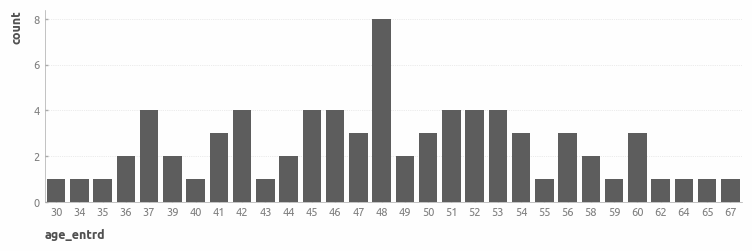

In [23]:
sns.barplot(putin_12_gov['age_entrd'].value_counts())

In [24]:
medved_gov = piro[piro['appM']==1].copy()

In [25]:
medved_gov.shape

(51, 114)

In [26]:
medved_gov['age_entrd'].median()

49.0

<Axes: xlabel='age_entrd', ylabel='count'>

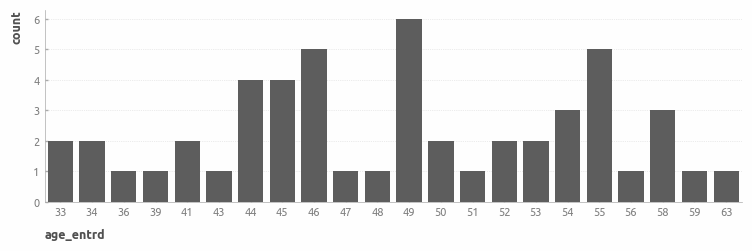

In [27]:
sns.barplot(medved_gov['age_entrd'].value_counts())

In [28]:
putin_34_gov = piro[piro['appP34']==1].copy()

In [29]:
putin_34_gov.shape

(96, 114)

In [30]:
putin_34_gov['age_entrd'].median()

48.0

<Axes: xlabel='age_entrd', ylabel='count'>

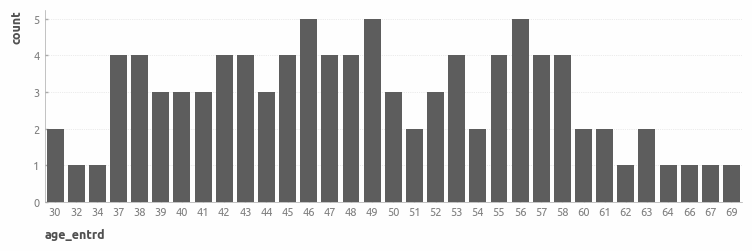

In [31]:
sns.barplot(putin_34_gov['age_entrd'].value_counts())

### Карьера после губернаторства

Особого изменения не заметно.

In [32]:
columns_career = [
    'governor_name', 'lft', 'prmtd', 'gvrnr_another_region', 'sm_lvl', 
    'hnr_pens', 'dmtd', 'left_wo_problems', 'left_w_problems', 'frd_rough', 'died',
    'lftP12', 'lftM', 'lftP34'
]

In [33]:
cols_status = [
    'prmtd', 'gvrnr_another_region', 'sm_lvl', 
    'hnr_pens', 'dmtd', 'left_wo_problems', 'left_w_problems', 'frd_rough', 'died'
]

In [34]:
cols_loyal = [
    'prmtd'
]

In [35]:
cols_neural = [
    'dmtd', 'left_wo_problems', 'hnr_pens',
]

In [36]:
cols_sanctions = [
    'left_w_problems', 'frd_rough',
]

In [37]:
piro_career = piro[columns_career].copy()

In [38]:
piro_career = piro_career.applymap(to_int)

In [39]:
is_nan(piro_career)

,governor_name,lft,prmtd,gvrnr_another_region,sm_lvl,hnr_pens,dmtd,left_wo_problems,left_w_problems,frd_rough,died,lftP12,lftM,lftP34
61,Зиничев Евгений Николаевич,2016-10-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
122,Шойгу Сергей Кужугетович,2012-11-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
166,Тарасенко Андрей Владимирович,2018-09-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
207,Развожаев Михаил Владимирович,2018-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
240,Фархутдинов Игорь Павлович,2003-08-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0


In [40]:
# drop who worked less than year 
piro_career = piro_career.dropna()

In [41]:
is_nan(piro_career)

There're no NaN values in DataFrame


In [42]:
piro_career_putin_12 = piro_career[piro_career['lftP12']==1].copy()

In [43]:
piro_career_medved = piro_career[piro_career['lftM']==1].copy()

In [44]:
piro_career_putin_34 = piro_career[piro_career['lftP34']==1].copy()

In [45]:
for df in [piro_career_putin_12, piro_career_medved, piro_career_putin_34]:
    df['promoted'] = df[cols_loyal].sum(axis=1)
    df['neural'] = df[cols_neural].sum(axis=1)
    df['sanctions'] = df[cols_sanctions].sum(axis=1)

In [46]:
cols_agg_status = ['promoted', 'neural', 'sanctions']

In [47]:
piro_career_putin_12_agg = piro_career_putin_12[cols_agg_status].sum()

In [48]:
piro_career_medved_agg = piro_career_medved[cols_agg_status].sum()

In [49]:
piro_career_putin_34_agg = piro_career_putin_34[cols_agg_status].sum()

In [50]:
piro_career_agg = pd.concat([
    piro_career_putin_12_agg, piro_career_medved_agg, piro_career_putin_34_agg
], axis=1, )

In [51]:
piro_career_agg.columns = ['pt12', 'med', 'pt34']

In [52]:
piro_career_agg

,pt12,med,pt34
promoted,3.0,7.0,10.0
neural,52.0,32.0,50.0
sanctions,13.0,9.0,19.0


In [53]:
piro_career_agg

,pt12,med,pt34
promoted,3.0,7.0,10.0
neural,52.0,32.0,50.0
sanctions,13.0,9.0,19.0


In [54]:
piro_career_agg_perc = (100.0*piro_career_agg / piro_career_agg.sum()).round(0)

In [55]:
piro_career_agg_perc = piro_career_agg_perc.T

In [56]:
piro_career_agg_perc

,promoted,neural,sanctions
pt12,4.0,76.0,19.0
med,15.0,67.0,19.0
pt34,13.0,63.0,24.0


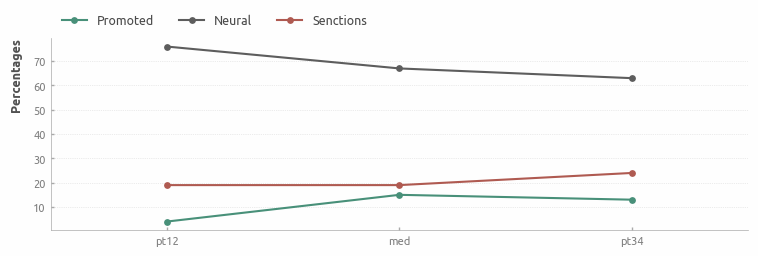

In [57]:
sns.pointplot(piro_career_agg_perc['promoted'], lw=1.5, color=palette[3], label='Promoted')
sns.pointplot(piro_career_agg_perc['neural'], lw=1.5, color=palette[0], label='Neural')
sns.pointplot(piro_career_agg_perc['sanctions'], lw=1.5, color=palette[1], label='Senctions')
plt.legend(**legend_inline, ncols=3)
plt.ylabel('Percentages')
plt.show()